In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
original_train_df = pd.read_csv('data/train.csv', index_col='Id')
original_test_df = pd.read_csv('data/test.csv', index_col='Id')
train_data = original_train_df.copy()
test_data = original_test_df.copy()
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [4]:
train_data.describe(include='object').T.sort_values(by=['unique'], ascending = False)

,count,unique,top,freq
Neighborhood,1460,25,NAmes,225
Exterior2nd,1460,16,VinylSd,504
Exterior1st,1460,15,VinylSd,515
SaleType,1460,9,WD,1267
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445
HouseStyle,1460,8,1Story,726
RoofMatl,1460,8,CompShg,1434
Functional,1460,7,Typ,1360
BsmtFinType2,1422,6,Unf,1256


In [5]:
train_data.head(5)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_data.select_dtypes(include=['int64', 'float64']).corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


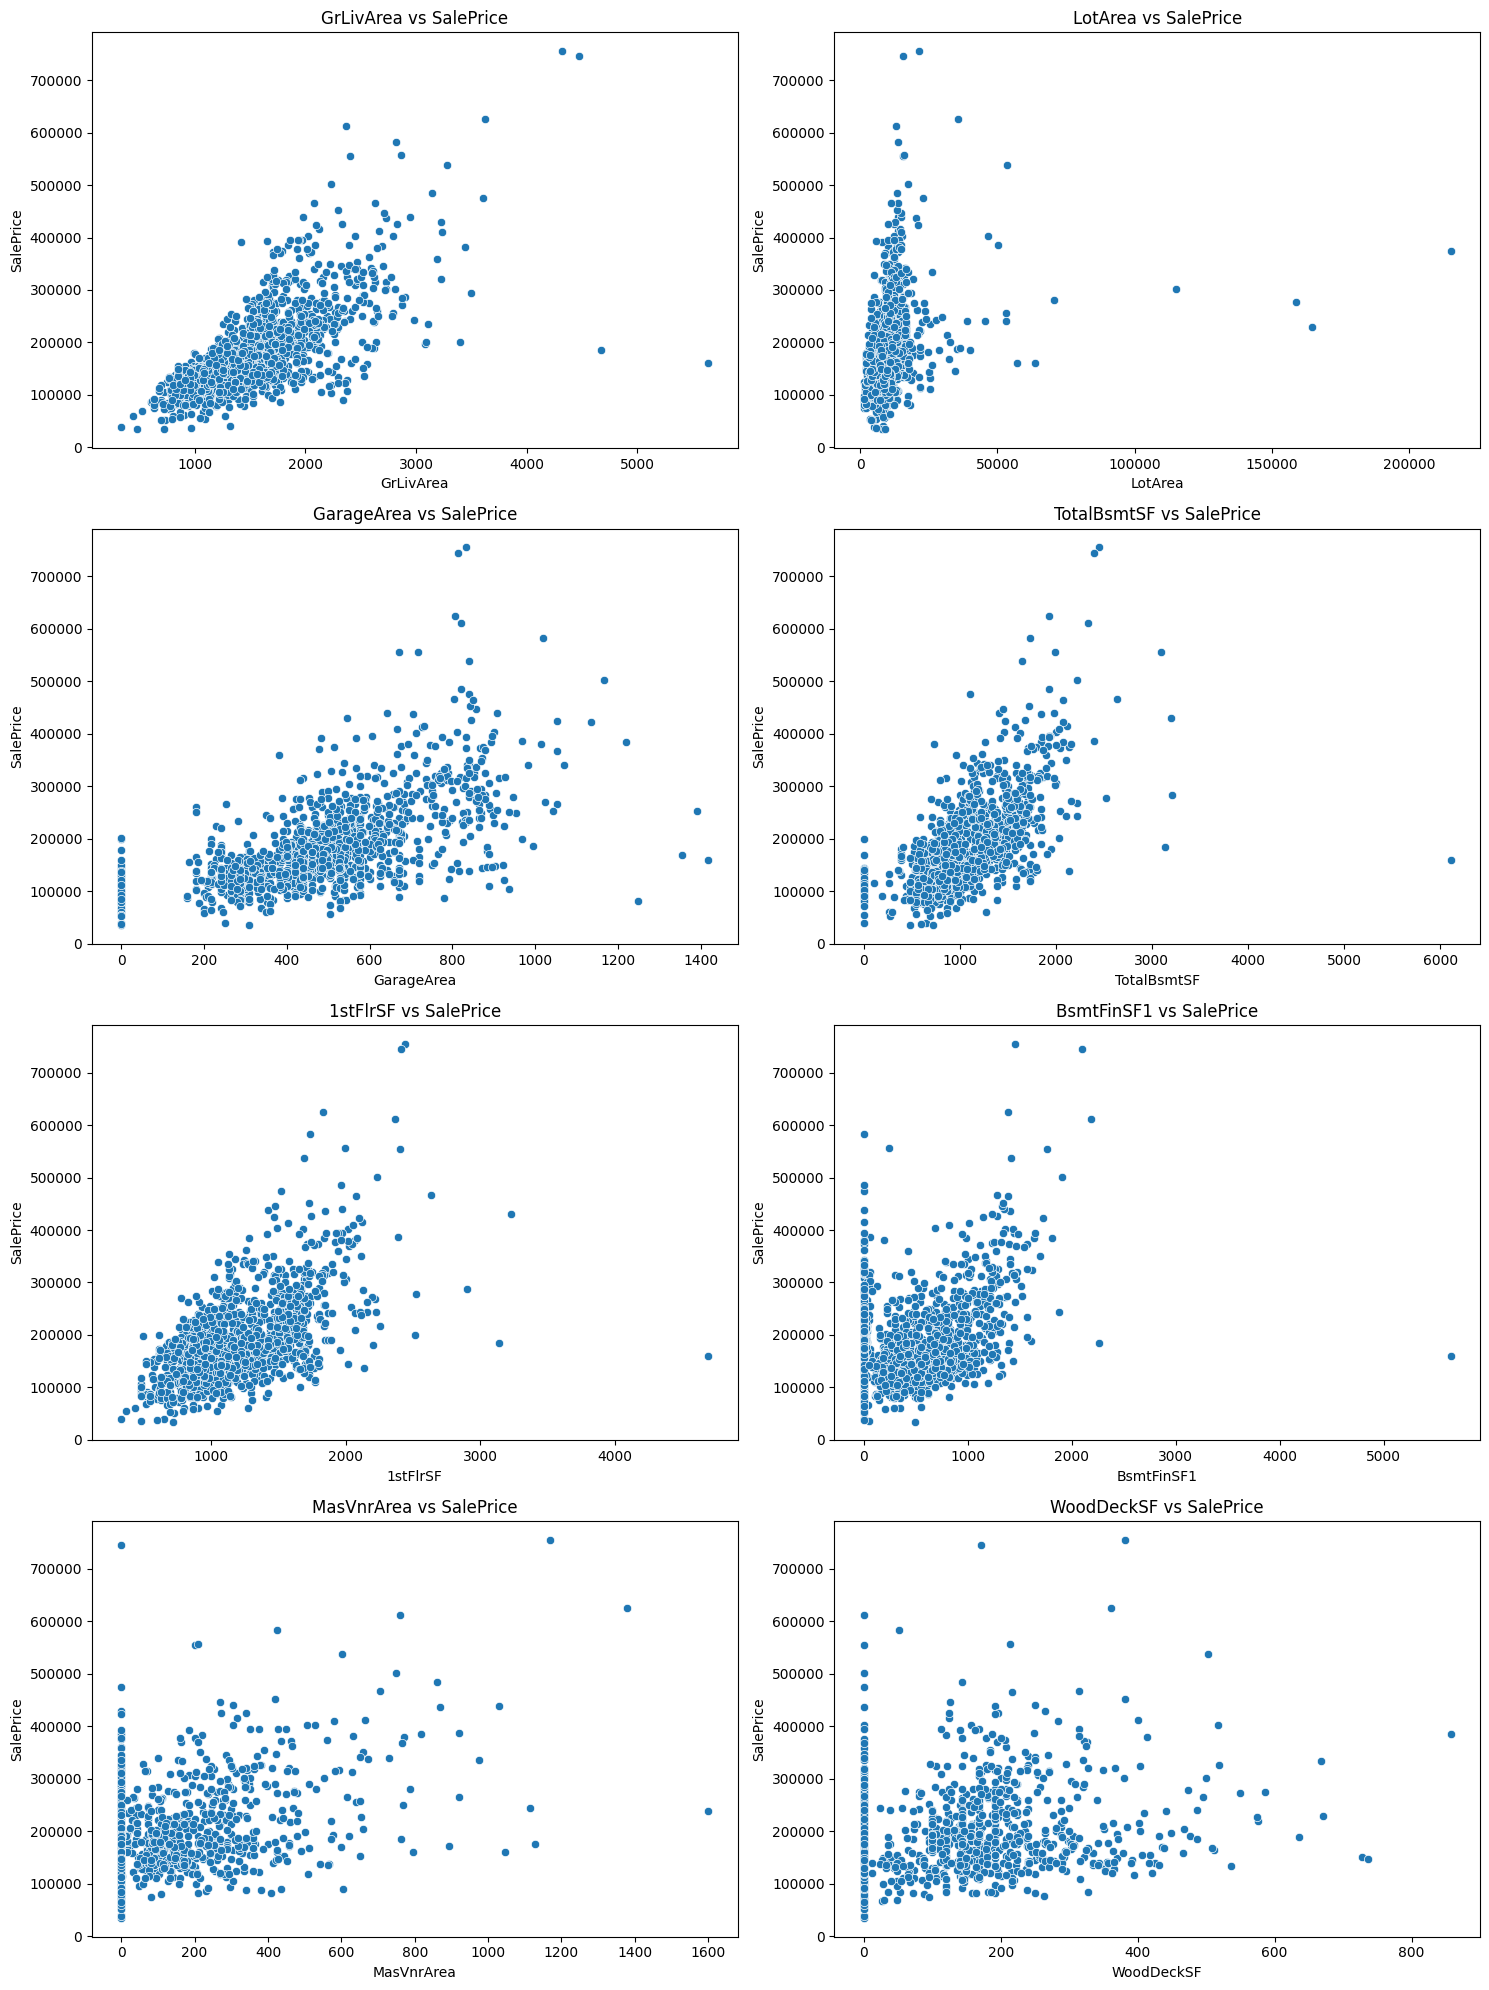

In [7]:
features_to_check = [
    'GrLivArea', 'LotArea', 'GarageArea', 'TotalBsmtSF', 
    '1stFlrSF', 'BsmtFinSF1', 'MasVnrArea', 'WoodDeckSF'
]

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features_to_check, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=train_data[feature], y=train_data['SalePrice'])
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

In [8]:

train_data = train_data[~((train_data['GrLivArea'] > 4500) & (train_data['SalePrice'] < 300000))]


train_data = train_data[~((train_data['LotArea'] > 100000) & (train_data['SalePrice'] < 450000))]


train_data = train_data[~((train_data['TotalBsmtSF'] > 6000) & (train_data['SalePrice'] < 300000))]


train_data = train_data[~((train_data['1stFlrSF'] > 4000) & (train_data['SalePrice'] < 200000))]


train_data = train_data[~((train_data['BsmtFinSF1'] > 5000) & (train_data['SalePrice'] < 200000))]


train_data = train_data[~((train_data['MasVnrArea'] > 1500) & (train_data['SalePrice'] < 300000))]

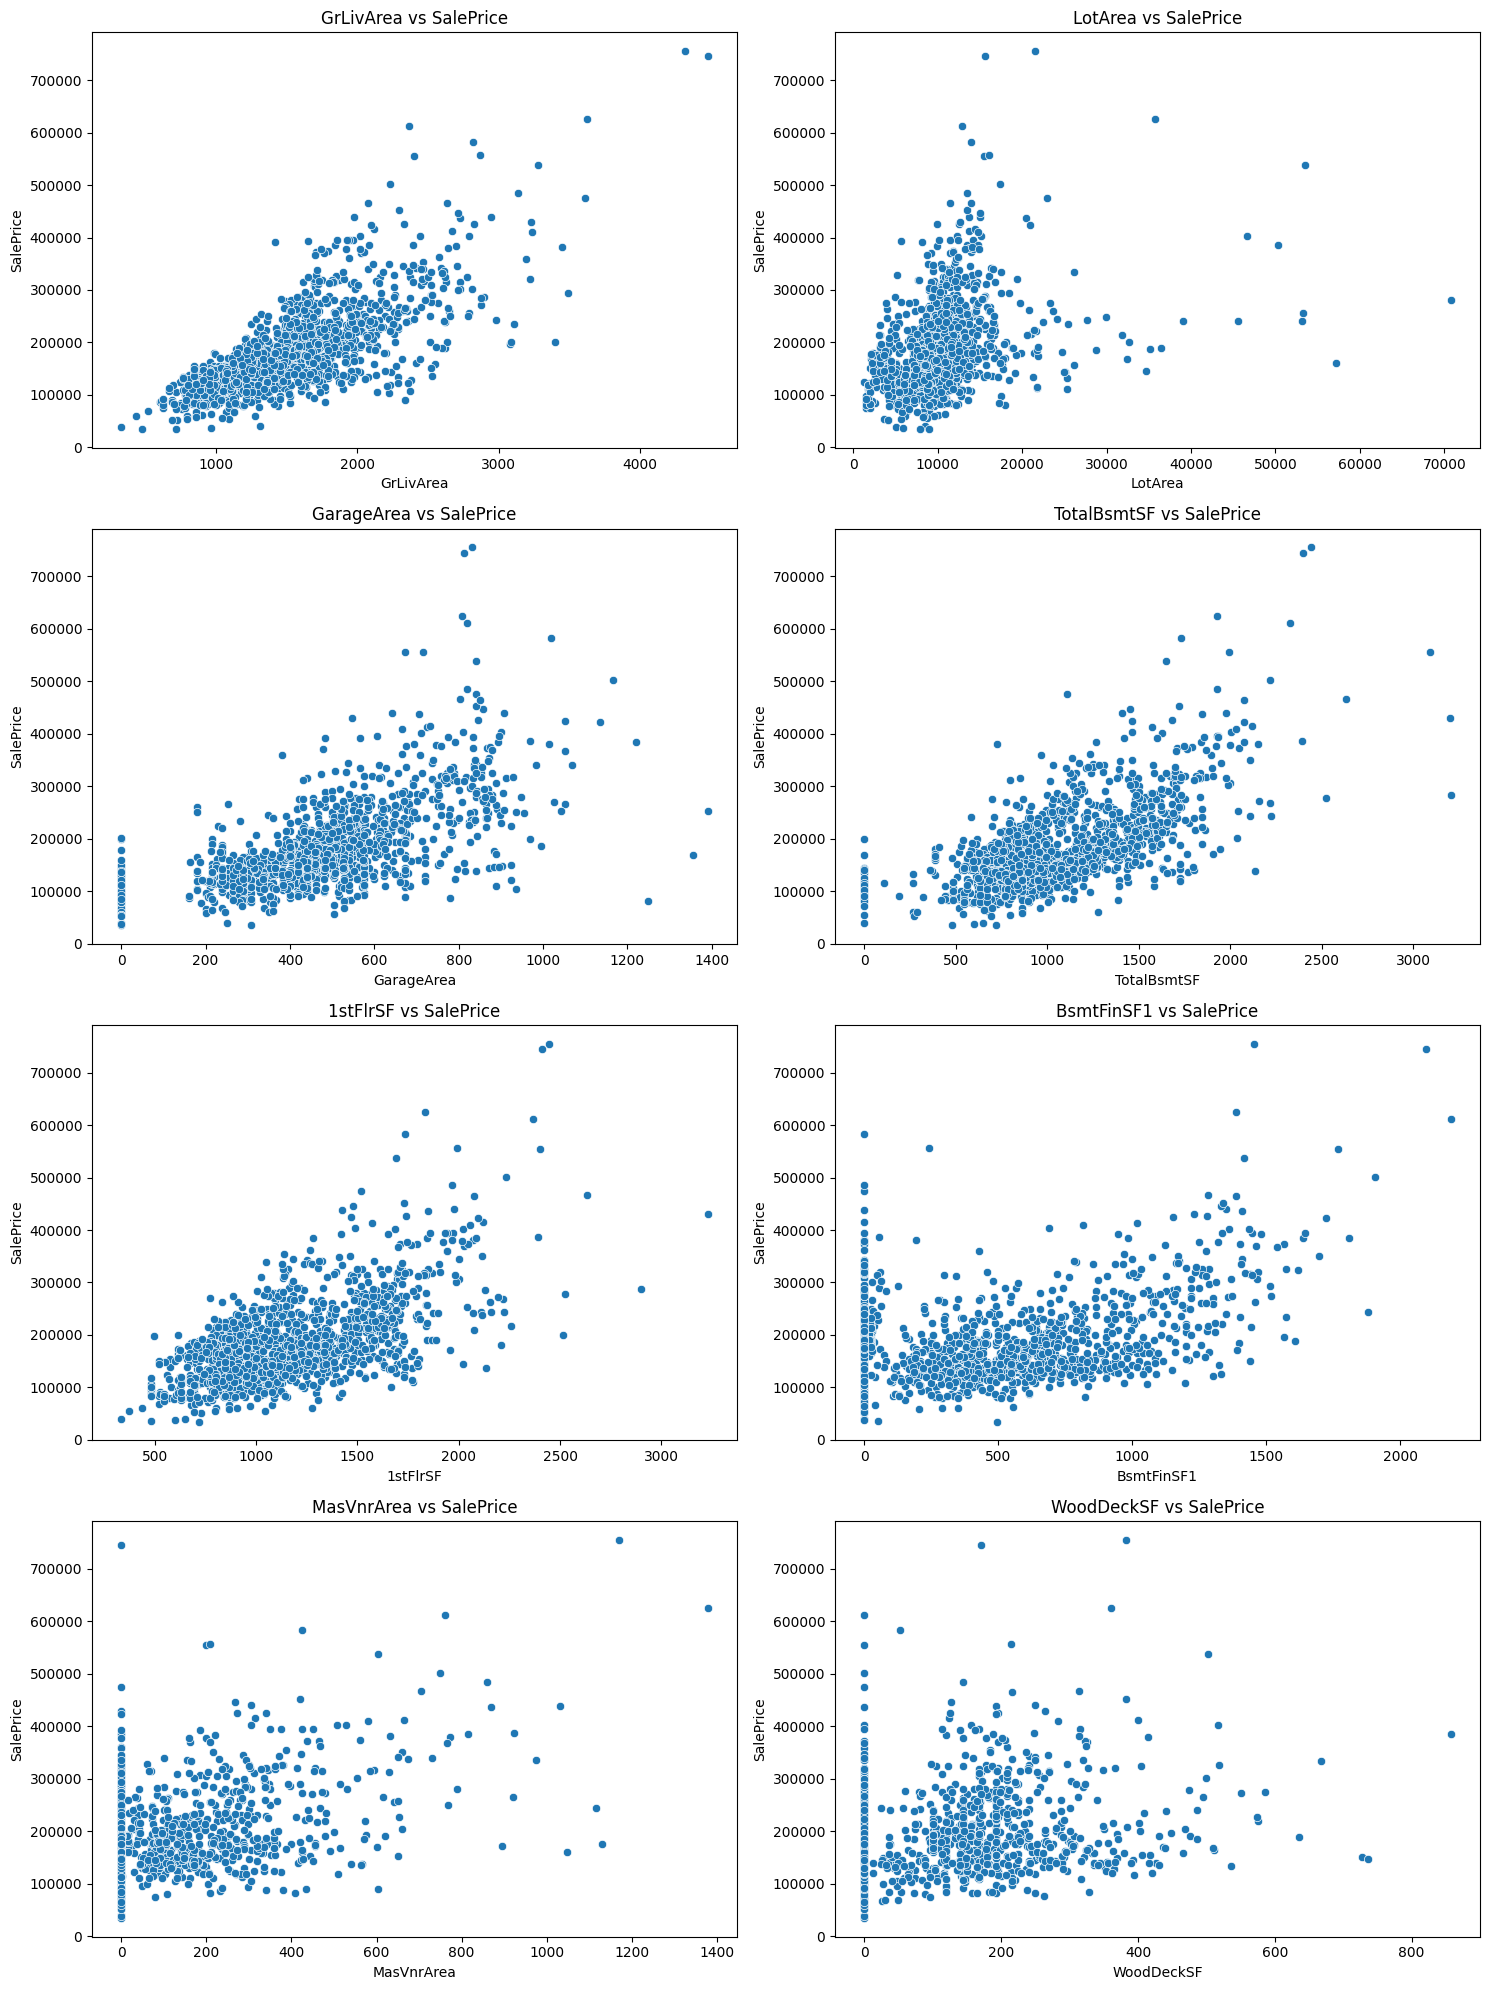

In [9]:
features_to_check = [
    'GrLivArea', 'LotArea', 'GarageArea', 'TotalBsmtSF', 
    '1stFlrSF', 'BsmtFinSF1', 'MasVnrArea', 'WoodDeckSF'
]

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features_to_check, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=train_data[feature], y=train_data['SalePrice'])
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

In [10]:
numerical=['LotFrontage', 'BsmtFinSF1', 'WoodDeckSF', 'MSSubClass', '2ndFlrSF', 'TotRmsAbvGrd', 'MasVnrArea', 'YearRemodAdd', 'ScreenPorch', 'OverallCond', 'EnclosedPorch', 'GrLivArea', 'GarageArea', 'LowQualFinSF', 'OverallQual', 'TotalBsmtSF', 'KitchenAbvGr', 'GarageYrBlt', 'BedroomAbvGr', '1stFlrSF', 'YearBuilt', 'OpenPorchSF', 'LotArea', 'BsmtUnfSF']
most_frequent_imp_cat=['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'YrSold', 'Fireplaces']
constant_imp_cat=['PoolQC','Alley','Fence']
categorical=most_frequent_imp_cat+constant_imp_cat
features = categorical + numerical

y = train_data['SalePrice']
X = train_data[features]
X_test = test_data[features]
X.head(5)

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,OverallQual,TotalBsmtSF,KitchenAbvGr,GarageYrBlt,BedroomAbvGr,1stFlrSF,YearBuilt,OpenPorchSF,LotArea,BsmtUnfSF
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,7,856,1,2003.0,3,856,2003,61,8450,150
2,RL,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,6,1262,1,1976.0,3,1262,1976,0,9600,284
3,RL,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,7,920,1,2001.0,3,920,2001,42,11250,434
4,RL,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,7,756,1,1998.0,3,961,1915,35,9550,540
5,RL,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,...,8,1145,1,2000.0,4,1145,2000,84,14260,490


In [11]:
numerical = X.select_dtypes(include=['int64', 'float64']).columns
categorical = X.select_dtypes(include=['object']).columns
categorical

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition', 'PoolQC', 'Alley', 'Fence'],
      dtype='object')

In [12]:
nunerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scalar', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', nunerical_transformer, numerical), 
    ('cat', categorical_transformer, categorical)
])


In [13]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('Regressor', XGBRegressor(random_state=1))
])

lgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('Regressor', LGBMRegressor(random_state=1))
])


In [14]:
# {'Regressor__learning_rate': 0.05, 'Regressor__max_depth': 5, 'Regressor__n_estimators': 500, 'Regressor__reg_alpha': 0.1, 'Regressor__reg_lambda': 1}


xgb_param_grid = {
    'Regressor__n_estimators': [500],
    'Regressor__learning_rate': [.05],
    'Regressor__max_depth': [5],
    'Regressor__reg_alpha' : [0.1],
    'Regressor__reg_lambda' : [1]
}
lgbm_param_grid = {
    'Regressor__n_estimators': [200, 500],
    'Regressor__learning_rate': [0.05, 0.1],
    'Regressor__max_depth': [5, 10]
}
cv = KFold(n_splits=5, shuffle=True, random_state=1)

xgb_grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=xgb_param_grid, cv=cv, scoring='neg_mean_squared_error', verbose=2)
lgbm_grid_search = GridSearchCV(estimator=lgbm_pipeline, param_grid=lgbm_param_grid, cv=cv, scoring='neg_mean_squared_error', verbose=2)
xgb_grid_search.fit(X, y)
lgbm_grid_search.fit(X, y)

ensemble = VotingRegressor([
    ('xgb', xgb_grid_search.best_estimator_),
    ('lgbm', lgbm_grid_search.best_estimator_)
])

ensemble.fit(X, y)
y_pred = ensemble.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END Regressor__learning_rate=0.05, Regressor__max_depth=5, Regressor__n_estimators=500, Regressor__reg_alpha=0.1, Regressor__reg_lambda=1; total time=   1.1s
[CV] END Regressor__learning_rate=0.05, Regressor__max_depth=5, Regressor__n_estimators=500, Regressor__reg_alpha=0.1, Regressor__reg_lambda=1; total time=   1.2s
[CV] END Regressor__learning_rate=0.05, Regressor__max_depth=5, Regressor__n_estimators=500, Regressor__reg_alpha=0.1, Regressor__reg_lambda=1; total time=   1.0s
[CV] END Regressor__learning_rate=0.05, Regressor__max_depth=5, Regressor__n_estimators=500, Regressor__reg_alpha=0.1, Regressor__reg_lambda=1; total time=   1.0s
[CV] END Regressor__learning_rate=0.05, Regressor__max_depth=5, Regressor__n_estimators=500, Regressor__reg_alpha=0.1, Regressor__reg_lambda=1; total time=   1.0s
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the over

In [15]:
id = (test_data.index)
output = pd.DataFrame({'Id': id,
                       'SalePrice': y_pred})
output.to_csv('submission.csv', index=False)
output


,Id,SalePrice
0,1461,127441.514537
1,1462,153123.299113
2,1463,183869.109585
3,1464,187531.957508
4,1465,192828.390989
...,...,...
1454,2915,80994.851768
1455,2916,76218.344278
1456,2917,167488.871365
1457,2918,118394.688630


In [16]:
y_test = pd.read_csv('../input/home-data-for-ml-course/sample_submission.csv', index_col='Id')

print(np.sqrt(mean_squared_error(y_pred, y_test)))

74800.07165726332


In [17]:
print(xgb_grid_search.best_params_)



{'Regressor__learning_rate': 0.05, 'Regressor__max_depth': 5, 'Regressor__n_estimators': 500, 'Regressor__reg_alpha': 0.1, 'Regressor__reg_lambda': 1}
